<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('states_edu.csv')

Chosen test: **Math for 8th grade**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
# renaming some columns
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [4]:
# filling in the missing estimates
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

In [5]:
# remove rows missing AVG_MATH_8_SCORE
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

In [6]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [7]:
# support services expenditure per student
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

In [8]:
# instruction expenditure per student
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

In [9]:
# total expenditure per student
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']

Text(0.5, 1.0, '8th grade math score over time, by state')

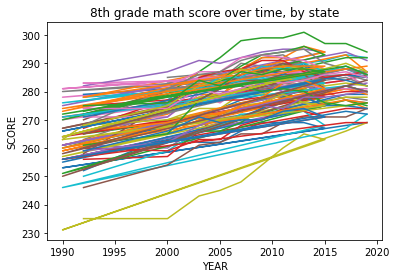

In [10]:
df.set_index('YEAR').groupby('STATE').AVG_MATH_8_SCORE.plot()
plt.ylabel('SCORE')
plt.title('8th grade math score over time, by state')

Final feature list: **SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT, INSTRUCTION_EXPENDITURE_PER_STUDENT, TOTAL_EXPENDITURE_PER_STUDENT, YEAR**

Feature selection justification: **I picked these features because the data is on the state level. This means that different states are going to spend more due to varying population sizes. The features I chose accounts for this. I also specifically chose YEAR because in the line graph above, it appears that avg math scores are generally trending upwards.**

<h2> EDA </h2>

Visualization 1

Text(0, 0.5, '8th grade math score')

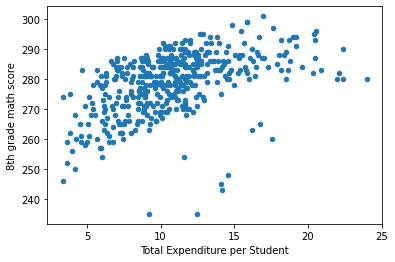

In [11]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('Total Expenditure per Student')
plt.ylabel('8th grade math score')

**There appears to be a positive linear association between total expenditure per student and avg 8th grade math scores. In addition, there appears to be some outliers towards the bottom of the graph.**

Visualization 2

Text(0, 0.5, '8th grade math score')

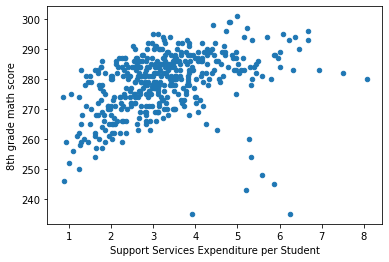

In [12]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('Support Services Expenditure per Student')
plt.ylabel('8th grade math score')

**There appears to be a positive linear association between support services expenditure per student and 8th grade math scores. Again, there appear to be some outliers near the bottom of the graph.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df[['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', 'INSTRUCTION_EXPENDITURE_PER_STUDENT', 
        'TOTAL_EXPENDITURE_PER_STUDENT', 'YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [16]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [17]:
# create your model here
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
# looking at the intercept and coefficients
print(model.intercept_)
print(model.coef_)

-715.0500135366993
[-5.63804511  1.7372184   1.4195809   0.49195855]


In [21]:
# looking at the R^2 value
model.score(X_test, y_test)

0.46449002622245406

In [22]:
# getting the RMSE
np.mean((y_pred-y_test)**2)**0.5

8.443838080242694

Text(0, 0.5, '8th grade math score')

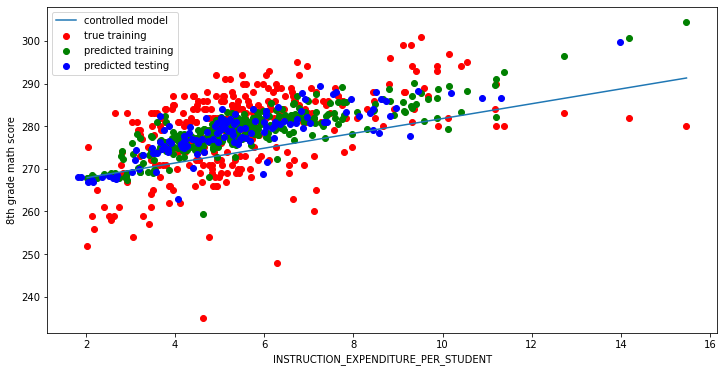

In [23]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th grade math score')

<h2> Summary </h2>

**I was interested in looking at 8th grade math scores, so I chose that as my outcome variable. I chose the variables SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT, INSTRUCTION_EXPENDITURE_PER_STUDENT, TOTAL_EXPENDITURE_PER_STUDENT, YEAR as my predictors. I then split the training and test data using a 70-30 split. For my model, I created and trained a multilinear regression model using sklearn's LinearRegression. The R-squared value of my multilinear regression model was about 0.464, which is not a particularly good fit for our data. In addition, the RMSE for the model is around 8.444, which is a little bit high. Because the R-squared value is low and the RMSE is a little high, I would not recommend using this model to predict avg 8th grade math scores.**